In [1]:
%cd ../
%matplotlib inline

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

In [3]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [4]:
new_pieman = niidb.FMriActivationsDb('data/new_pieman.db')

In [5]:
dtfa = DTFA.DeepTFA(new_pieman.all(), mask='/home/eli/Documents/new_pieman/all_tasks/wholebrain.nii.gz', num_factors=100, embedding_dim=2)

01/22/2019 17:05:16 Loading Nifti image /home/eli/Documents/new_pieman/all_tasks/sub-1-task-intact1.nii with mask /home/eli/Documents/new_pieman/all_tasks/wholebrain.nii.gz (zscore=True, smooth=None)
01/22/2019 17:05:20 Loading Nifti image /home/eli/Documents/new_pieman/all_tasks/sub-1-task-word.nii with mask /home/eli/Documents/new_pieman/all_tasks/wholebrain.nii.gz (zscore=True, smooth=None)
01/22/2019 17:05:24 Loading Nifti image /home/eli/Documents/new_pieman/all_tasks/sub-10-task-intact1.nii with mask /home/eli/Documents/new_pieman/all_tasks/wholebrain.nii.gz (zscore=True, smooth=None)
01/22/2019 17:05:28 Loading Nifti image /home/eli/Documents/new_pieman/all_tasks/sub-10-task-word.nii with mask /home/eli/Documents/new_pieman/all_tasks/wholebrain.nii.gz (zscore=True, smooth=None)
01/22/2019 17:05:31 Loading Nifti image /home/eli/Documents/new_pieman/all_tasks/sub-100-task-rest2.nii with mask /home/eli/Documents/new_pieman/all_tasks/wholebrain.nii.gz (zscore=True, smooth=None)
01/2

In [6]:
dtfa.load_state('data/pieman_n1200_k100_01192019_154020')

In [7]:
def task_labeler(b):
    if 'intact' in b.task:
        return 'Intact story'
    elif 'word' in b.task:
        return 'Word scrambled'
    elif b.task == 'paragraph':
        return 'Paragraph scrambled'
    elif 'rest' in b.task:
        return 'Resting state'

In [8]:
def subject_labeler(block):
    return 'Subject %d' % block.subject

In [9]:
def pieman_labeler(block):
    subject = subject_labeler(block)
    task = task_labeler(block)
    return subject + ', ' + task + ' stimulus'

01/22/2019 17:15:17 Plotting factors for Participant 98, run 0


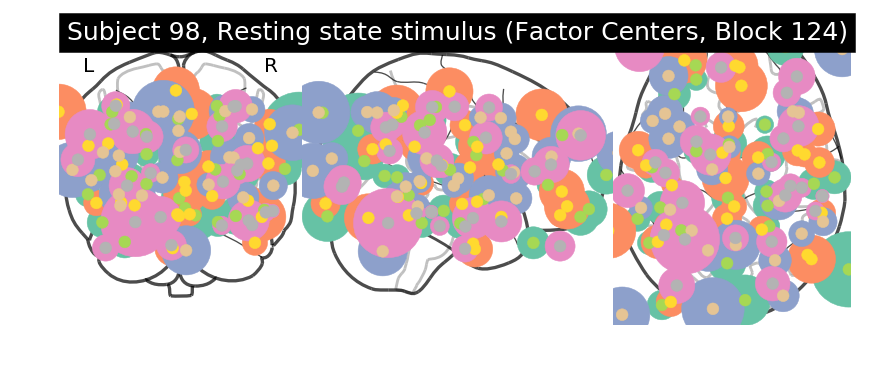

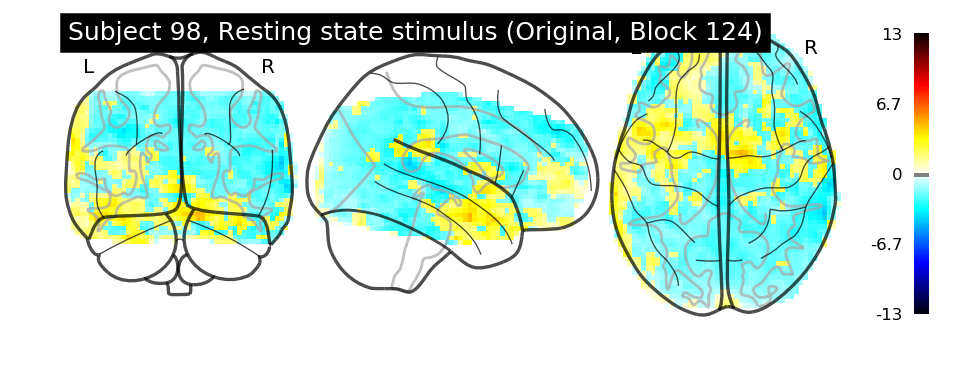

01/22/2019 17:15:44 Reconstruction Error (Frobenius Norm): 6.20120654e+03 out of 4.95447168e+03


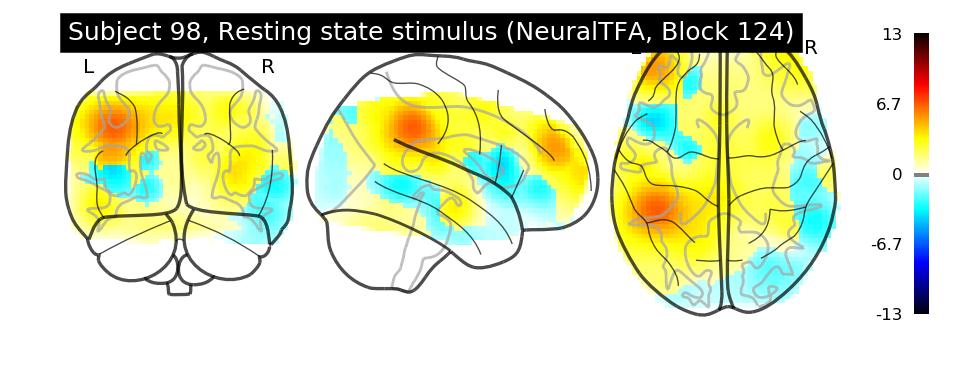

In [10]:
subject_runs = set([(block.subject, block.run) for block in dtfa._blocks])

for i in np.random.choice(range(len(subject_runs)), 1):
    subject, run = list(subject_runs)[i]
    logging.info('Plotting factors for Participant %d, run %d' % (subject, run))
    blocks = [block for block in dtfa._blocks if block.subject == subject and block.run == run]
    blocks.sort(key=lambda b: b.start_time)
    for block in blocks:
        index = dtfa._blocks.index(block)
        dtfa.plot_factor_centers(index, labeler=pieman_labeler)
        dtfa.plot_original_brain(index, labeler=pieman_labeler)
        dtfa.plot_reconstruction(index, labeler=pieman_labeler)


/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


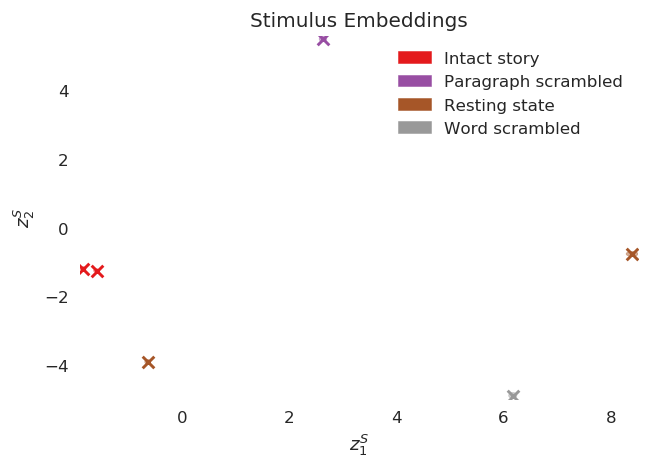

In [17]:
dtfa.scatter_task_embedding(labeler=task_labeler, figsize=(6, 4))

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


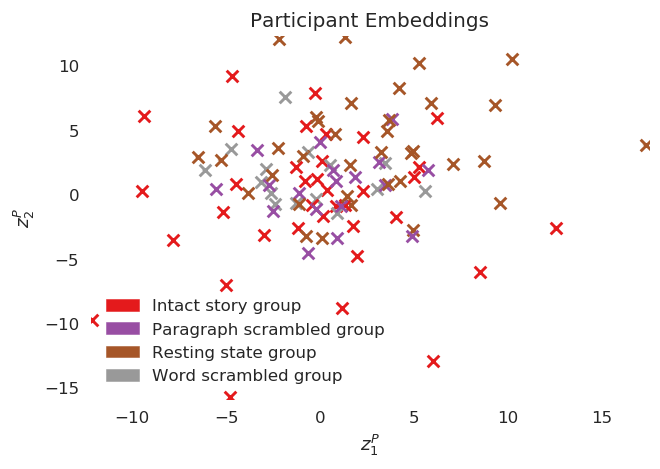

In [15]:
dtfa.scatter_subject_embedding(labeler=lambda b: task_labeler(b) + ' group', figsize=(6, 4))